# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from pandas.api.types import is_string_dtype
from sklearn.feature_selection import RFE

In [4]:
df = pd.read_excel('GermanCredit.xlsx')

# 2. Check how many records do we have


In [6]:
df.shape

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

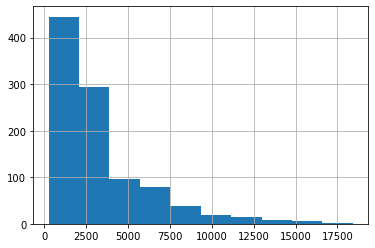

In [9]:
df['CreditAmount'].hist()
plt.show()

# 3b. Create creditability dataframe

In [17]:
one=pd.DataFrame(df[df['Creditability']==1])
zero = pd.DataFrame(df[df['Creditability']==0])

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [22]:
Creditability=pd.concat([one,zero])

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

In [30]:
one['Creditability']=one['Creditability'].astype(object)
zero['Creditability']=zero['Creditability'].astype(object)

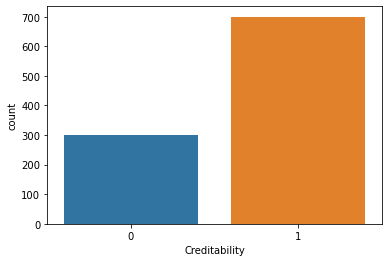

In [38]:
sns.countplot(df['Creditability'])
plt.show()

# 6. Prepare input data for the model

In [40]:
x = df.drop(columns='Creditability')
y =df['Creditability']

# 7. Fit logistic regression model

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=10)

In [42]:
log = LogisticRegression()
lr=log.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

# 8. Test accuracy calculation

In [44]:
print("Training Accuracy")
print(lr.score(xtrain,ytrain))
print("Testing Accuracy")
print(lr.score(xtest,ytest))

Training Accuracy
0.7214285714285714
Testing Accuracy
0.67


# 9. Build a confusion matrix

In [45]:
confusion_matrix(ytest,ypred)

array([[ 11,  87],
       [ 12, 190]], dtype=int64)

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [63]:
predpob=lr.predict_proba(xtrain)

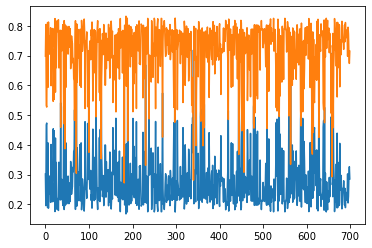

In [67]:
plt.plot(predpob)
plt.show()